# Customer Churn Prediction Model
- `The Goal of the Project is to Predict customers likely to churn within the next 6 months. This model will help the company implement counter-intuitive measures to prevent a lot of churn. The company is interested in keeping old customers more than losing them, therefore this model will prioritze recall. The cost of losing customers is more damaging to the company than running discounts and marketing campaigns.`

- `Last year the company's customer database shrunk from 600,000 to 500,000 resulting in a profit decline of USD 50,000,000 whiles the cost of marketing campaigns and initiatives amounted to only USD 400,000.`

- `The end goal for this project, is to build a model that can catch as much churners as it possibly can`

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from scipy.stats import mannwhitneyu, chi2_contingency
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
# open csv file
FILE_PATH = '../data/raw/customer_churn.csv'
try:
    if not Path(FILE_PATH).exists():
        raise FileNotFoundError(f'File not found!')
    
    df = pd.read_csv(FILE_PATH)
    if df.empty:
        raise pd.errors.EmptyDataError(f'Dataframe is empty')
except Exception as e:
    print(f'Error: {e}')

In [3]:
df.head(30)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Customer_Age,Gender,...,Category,Subcategory,Cost,Discount_Applied,Payment_Method,Promo_Applied,Delivery_Time_Days,Revenue,Profit,Churn_Flag
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,26.0,Female,...,Home Decor,Decor,4.469733,0,Credit Card,0,5,83.40,29.763202,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,29.0,Female,...,Toys,Kids,3.282128,0,PayPal,0,9,81.00,41.614466,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,33.0,Female,...,Kitchen,Appliances,4.612600,0,Cash,0,7,81.00,25.648799,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,79.0,Female,...,Clothing,Women,1.120376,0,Bank Transfer,0,8,100.80,47.021953,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,43.0,Female,...,Clothing,Men,0.848714,0,Cash,0,8,30.00,9.630864,0
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,40.0,Female,...,Kitchen,Storage,1.128552,0,Cash,0,7,39.60,12.514755,0
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,21.0,Female,...,Toys,Outdoor,0.724196,0,Credit Card,1,6,30.00,12.619295,1
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,35.0,Male,...,Toys,Kids,4.500678,0,Cash,1,3,59.50,14.493223,1
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,55.0,Female,...,Stationery,Art,1.773926,0,Cash,0,2,30.60,9.312890,1
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,40.0,Male,...,Home Decor,Lights,1.732001,0,Credit Card,0,2,45.00,24.215990,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,743486.0,10.036420,154.201706,-74215.000000,1.000000,3.000000,10.000000,74215.000000
Price,743485.0,4.774413,132.680219,-53594.360000,1.250000,2.100000,4.210000,25111.090000
Customer ID,573570.0,15336.642474,1693.380372,12346.000000,13963.000000,15289.000000,16805.000000,18287.000000
Customer_Age,573570.0,48.450948,17.873257,18.000000,33.000000,48.000000,64.000000,79.000000
Cost,743485.0,2.857944,81.024623,-34992.590744,0.712005,1.292530,2.527461,19645.769724
Discount_Applied,743486.0,0.099686,0.299581,0.000000,0.000000,0.000000,0.000000,1.000000
Promo_Applied,743486.0,0.199984,0.399988,0.000000,0.000000,0.000000,0.000000,1.000000
Delivery_Time_Days,743486.0,5.002327,2.577885,1.000000,3.000000,5.000000,7.000000,9.000000
Revenue,743485.0,18.029966,195.068370,-77183.600000,3.750000,9.950000,17.700000,77183.600000
Profit,743485.0,7.251679,87.173822,-30946.200363,1.390169,3.533854,7.228494,45664.107562


In [5]:
# summary statistics of data
if len(df) < 1:
    raise pd.errors.EmptyDataError(f'DataFrame is Empty!')

summary = {
    'observations' : len(df),
    'features' : len(df.columns)
}
print(summary)

{'observations': 743486, 'features': 24}


# `DATA QUALITY CHECKS`

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743486 entries, 0 to 743485
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Invoice             743486 non-null  object 
 1   StockCode           743486 non-null  object 
 2   Description         739714 non-null  object 
 3   Quantity            743486 non-null  int64  
 4   InvoiceDate         743485 non-null  object 
 5   Price               743485 non-null  float64
 6   Customer ID         573570 non-null  float64
 7   Country             743485 non-null  object 
 8   Customer_Age        573570 non-null  float64
 9   Gender              573570 non-null  object 
 10  Signup_Date         743485 non-null  object 
 11  Last_Login_Date     743485 non-null  object 
 12  Customer_Segment    573570 non-null  object 
 13  Marketing_Channel   573570 non-null  object 
 14  Category            743486 non-null  object 
 15  Subcategory         743486 non-nul

In [7]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for i, col in enumerate(numeric_cols, 1):
    print(f'{i:<2}. {col:<19} | Min : {df[col].min():<20} | Max : {df[col].max()}')

1 . Quantity            | Min : -74215               | Max : 74215
2 . Price               | Min : -53594.36            | Max : 25111.09
3 . Customer ID         | Min : 12346.0              | Max : 18287.0
4 . Customer_Age        | Min : 18.0                 | Max : 79.0
5 . Cost                | Min : -34992.5907438715    | Max : 19645.769724168946
6 . Discount_Applied    | Min : 0                    | Max : 1
7 . Promo_Applied       | Min : 0                    | Max : 1
8 . Delivery_Time_Days  | Min : 1                    | Max : 9
9 . Revenue             | Min : -77183.6             | Max : 77183.6
10. Profit              | Min : -30946.20036270518   | Max : 45664.10756195218
11. Churn_Flag          | Min : 0                    | Max : 1


In [8]:
categorical_col = df.select_dtypes(exclude=[np.number]).columns.tolist()
for i, col in enumerate(categorical_col, 1):
    print(f'{i:<2}. {col:<19} | Uniques : {df[col].nunique()} | Examples : {df[col].unique()[:3]}')

1 . Invoice             | Uniques : 38978 | Examples : ['489434' '489435' '489436']
2 . StockCode           | Uniques : 4873 | Examples : ['85048' '79323P' '79323W']
3 . Description         | Uniques : 5052 | Examples : ['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS']
4 . InvoiceDate         | Uniques : 34509 | Examples : ['2009-12-01 07:45:00' '2009-12-01 07:46:00' '2009-12-01 09:06:00']
5 . Country             | Uniques : 43 | Examples : ['United Kingdom' 'France' 'USA']
6 . Gender              | Uniques : 2 | Examples : ['Female' 'Male' nan]
7 . Signup_Date         | Uniques : 392967 | Examples : ['2009-07-22 07:45:00' '2008-08-23 07:45:00' '2009-02-04 07:45:00']
8 . Last_Login_Date     | Uniques : 358330 | Examples : ['2009-10-04 07:45:00' '2009-08-19 07:45:00' '2009-08-25 07:45:00']
9 . Customer_Segment    | Uniques : 3 | Examples : ['Regular' 'VIP' 'New']
10. Marketing_Channel   | Uniques : 4 | Examples : ['Organic' 'Referral' 'Ads']
11. Catego

In [9]:
# round currencies to 2 decimal places for consistency with real-life assumptions and practices
round_cols = ['Cost','Revenue','Profit']
for col in round_cols:
    df[col] = df[col].round(2)

In [10]:
df['Last_Login_Date'] = pd.to_datetime(df['Last_Login_Date'])
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'])

In [11]:
def convert_to_int(col):
    try:
        df[col] = df[col].replace([np.inf,-np.inf], np.nan, regex=True)
        df.dropna(subset=[col], inplace=True)
        df[col] = df[col].convert_dtypes()
    except ValueError as e:
        print(f'Error converting columns to integer type : {e}')

convert_cols = ['Customer_Age', 'Customer ID']
for col in convert_cols:
    convert_to_int(col)

In [12]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Customer_Age,Gender,...,Category,Subcategory,Cost,Discount_Applied,Payment_Method,Promo_Applied,Delivery_Time_Days,Revenue,Profit,Churn_Flag
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,26,Female,...,Home Decor,Decor,4.47,0,Credit Card,0,5,83.4,29.76,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,29,Female,...,Toys,Kids,3.28,0,PayPal,0,9,81.0,41.61,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,33,Female,...,Kitchen,Appliances,4.61,0,Cash,0,7,81.0,25.65,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,79,Female,...,Clothing,Women,1.12,0,Bank Transfer,0,8,100.8,47.02,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,43,Female,...,Clothing,Men,0.85,0,Cash,0,8,30.0,9.63,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 573570 entries, 0 to 743484
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Invoice             573570 non-null  object        
 1   StockCode           573570 non-null  object        
 2   Description         573570 non-null  object        
 3   Quantity            573570 non-null  int64         
 4   InvoiceDate         573570 non-null  object        
 5   Price               573570 non-null  float64       
 6   Customer ID         573570 non-null  Int64         
 7   Country             573570 non-null  object        
 8   Customer_Age        573570 non-null  Int64         
 9   Gender              573570 non-null  object        
 10  Signup_Date         573570 non-null  datetime64[ns]
 11  Last_Login_Date     573570 non-null  datetime64[ns]
 12  Customer_Segment    573570 non-null  object        
 13  Marketing_Channel   573570 non-nul

$MISSING$  $VALUES$

In [14]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_pct = (missing / len(df)) * 100


summary = pd.DataFrame({
    'missing' : missing,
    'missing_pct' : missing_pct.round(2),
})
summary

,missing,missing_pct


In [15]:
df[df['Customer ID'].isnull()][['Customer ID','Customer_Age','Customer_Segment','Marketing_Channel','Gender','Description']]

,Customer ID,Customer_Age,Customer_Segment,Marketing_Channel,Gender,Description


$INSIGHT$
- Missing values for Customer ID, Customer_Age, Customer_Segment, Marketing_Channel, Gender all have same missing values in common. The observation of missing values suggest systematic omission of values.

In [16]:
# duplicates
duplicates = df[df.duplicated()]
if len(duplicates) == 0:
    print(f'No duplicates found')
else:
    duplicates

No duplicates found


In [17]:
# outlier detection
for i, col in enumerate(numeric_cols,1):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'{i:<2}. {col:<19} | Outliers : {len(outliers):<8} | Range ({lower_bound.round(2)} - {upper_bound.round(2)})')

1 . Quantity            | Outliers : 37619    | Range (-13.0 - 27.0)
2 . Price               | Outliers : 51206    | Range (-2.5 - 7.5)
3 . Customer ID         | Outliers : 0        | Range (9700.0 - 21068.0)
4 . Customer_Age        | Outliers : 0        | Range (-13.5 - 110.5)
5 . Cost                | Outliers : 47366    | Range (-1.68 - 4.56)
6 . Discount_Applied    | Outliers : 56994    | Range (0.0 - 0.0)
7 . Promo_Applied       | Outliers : 114857   | Range (0.0 - 0.0)
8 . Delivery_Time_Days  | Outliers : 0        | Range (-3.0 - 13.0)
9 . Revenue             | Outliers : 49510    | Range (-18.62 - 42.38)
10. Profit              | Outliers : 50380    | Range (-7.76 - 17.4)
11. Churn_Flag          | Outliers : 0        | Range (-1.5 - 2.5)


In [18]:
# analyzing outliers of some columns that have odd values 
df[(df['Quantity'] < 0) | (df['Price'] < 0) | (df['Revenue'] < 0)][['Quantity','Cost','Price','Revenue','Profit']]

,Quantity,Cost,Price,Revenue,Profit
178,-12,2.17,2.95,-35.40,-9.34
179,-6,0.82,1.65,-9.90,-4.97
180,-4,2.05,4.25,-17.00,-8.81
181,-6,1.03,2.10,-12.60,-6.45
182,-12,2.27,2.95,-35.40,-8.15
...,...,...,...,...,...
743235,-6,1.30,2.95,-17.70,-9.87
743236,-12,0.22,0.39,-4.68,-2.07
743237,-24,0.10,0.19,-4.56,-2.18
743238,-16,0.73,1.25,-20.00,-8.38


In [19]:
y = -6 * 1.65
print(y)
z = -6 * 0.82
print(y - z)

-9.899999999999999
-4.979999999999999


`Assumptions about the Quantity / Cost / Price / Revenue / Profit columns`
- Negative values in these columns are losses
- Outliers in the 'Quantity' column is determined by the other 4 remaining columns. In essence, if quantity value is an outlier,
then Price, revenue and profit all have corresponding values of 0.0

`Assumptions about other columns perceived to contain outliers`
- Discount Applied and Promo Applied both have similar unique values, 0 and 1.

`Limitations`
The difference between 'cost' and 'Price' is clearly not defined in this context. But upon further investigation, 
certain formulas have been derieved which satisfy the presence of values in each column
- `Formula 1` : Revenue = Quantity * Price
- `Formula 2` : Profit = Revenue - (Quantity * Cost)

$UNIVARIATE$ $ANALYSIS$

In [20]:
# shapiro-wilk test
def test_normality_shapiro(series):
    '''
    H0 : Data is normally distributed
    H1 : Data is NOT normally distributed
    '''
    series = series.dropna()

    stat, p_value = stats.shapiro(series.sample(min(5000, len(series)), random_state=42))

    return {
        'test' : 'Shapiro-Wilk Normality test',
        'statistic' : stat,
        'p_value' : p_value,
        'normal' : True if p_value >= 0.05 else False
    }

for col in numeric_cols:
    normality = test_normality_shapiro(df[col])
    print(f'{col:<19} | P-value : {round(normality['p_value'],2):<3} | Is Normal : {normality['normal']} ({normality['test']})')

Quantity            | P-value : 0.0 | Is Normal : False (Shapiro-Wilk Normality test)
Price               | P-value : 0.0 | Is Normal : False (Shapiro-Wilk Normality test)
Customer ID         | P-value : 0.0 | Is Normal : False (Shapiro-Wilk Normality test)
Customer_Age        | P-value : 0.0 | Is Normal : False (Shapiro-Wilk Normality test)
Cost                | P-value : 0.0 | Is Normal : False (Shapiro-Wilk Normality test)
Discount_Applied    | P-value : 0.0 | Is Normal : False (Shapiro-Wilk Normality test)
Promo_Applied       | P-value : 0.0 | Is Normal : False (Shapiro-Wilk Normality test)
Delivery_Time_Days  | P-value : 0.0 | Is Normal : False (Shapiro-Wilk Normality test)
Revenue             | P-value : 0.0 | Is Normal : False (Shapiro-Wilk Normality test)
Profit              | P-value : 0.0 | Is Normal : False (Shapiro-Wilk Normality test)
Churn_Flag          | P-value : 0.0 | Is Normal : False (Shapiro-Wilk Normality test)


`Insight`
None of the numerical distributions are normally distributed

In [21]:
# confidence_interval
def calculate_confidence_interval(df, confidence):
    clean_data = df.dropna()
    if len(clean_data) < 3:
        print(f'Not enough data for confidence interval analysis')
        sys.exit(1)

    mean = float(np.mean(clean_data))
    std_error = float(stats.sem(clean_data))
    margin_error = std_error * stats.t.ppf((1 + confidence) / 2, len(clean_data) - 1)

    return {
        'mean' : round(mean, 2),
        'lower_bound' : round((mean - margin_error), 2),
        'upper_bound' : round((mean + margin_error), 2),
        'margin_of_error' : round(margin_error, 2),
        'confidence' : confidence
    }
    
confidence = 0.95
for col in numeric_cols:
    ci = calculate_confidence_interval(df[col], confidence)
    print(f'{col:<19} | Mean : {ci['mean']:<10} | Lower_bound : {ci['lower_bound']:<10} | Upper_bound : {ci['upper_bound']}')

Quantity            | Mean : 12.59      | Lower_bound : 12.16      | Upper_bound : 13.02
Price               | Mean : 3.81       | Lower_bound : 3.64       | Upper_bound : 3.98
Customer ID         | Mean : 15336.64   | Lower_bound : 15332.26   | Upper_bound : 15341.02
Customer_Age        | Mean : 48.45      | Lower_bound : 48.4       | Upper_bound : 48.5
Cost                | Mean : 2.28       | Lower_bound : 2.17       | Upper_bound : 2.39
Discount_Applied    | Mean : 0.1        | Lower_bound : 0.1        | Upper_bound : 0.1
Promo_Applied       | Mean : 0.2        | Lower_bound : 0.2        | Upper_bound : 0.2
Delivery_Time_Days  | Mean : 5.0        | Lower_bound : 4.99       | Upper_bound : 5.01
Revenue             | Mean : 20.24      | Lower_bound : 19.79      | Upper_bound : 20.69
Profit              | Mean : 8.14       | Lower_bound : 7.94       | Upper_bound : 8.35
Churn_Flag          | Mean : 0.64       | Lower_bound : 0.64       | Upper_bound : 0.64


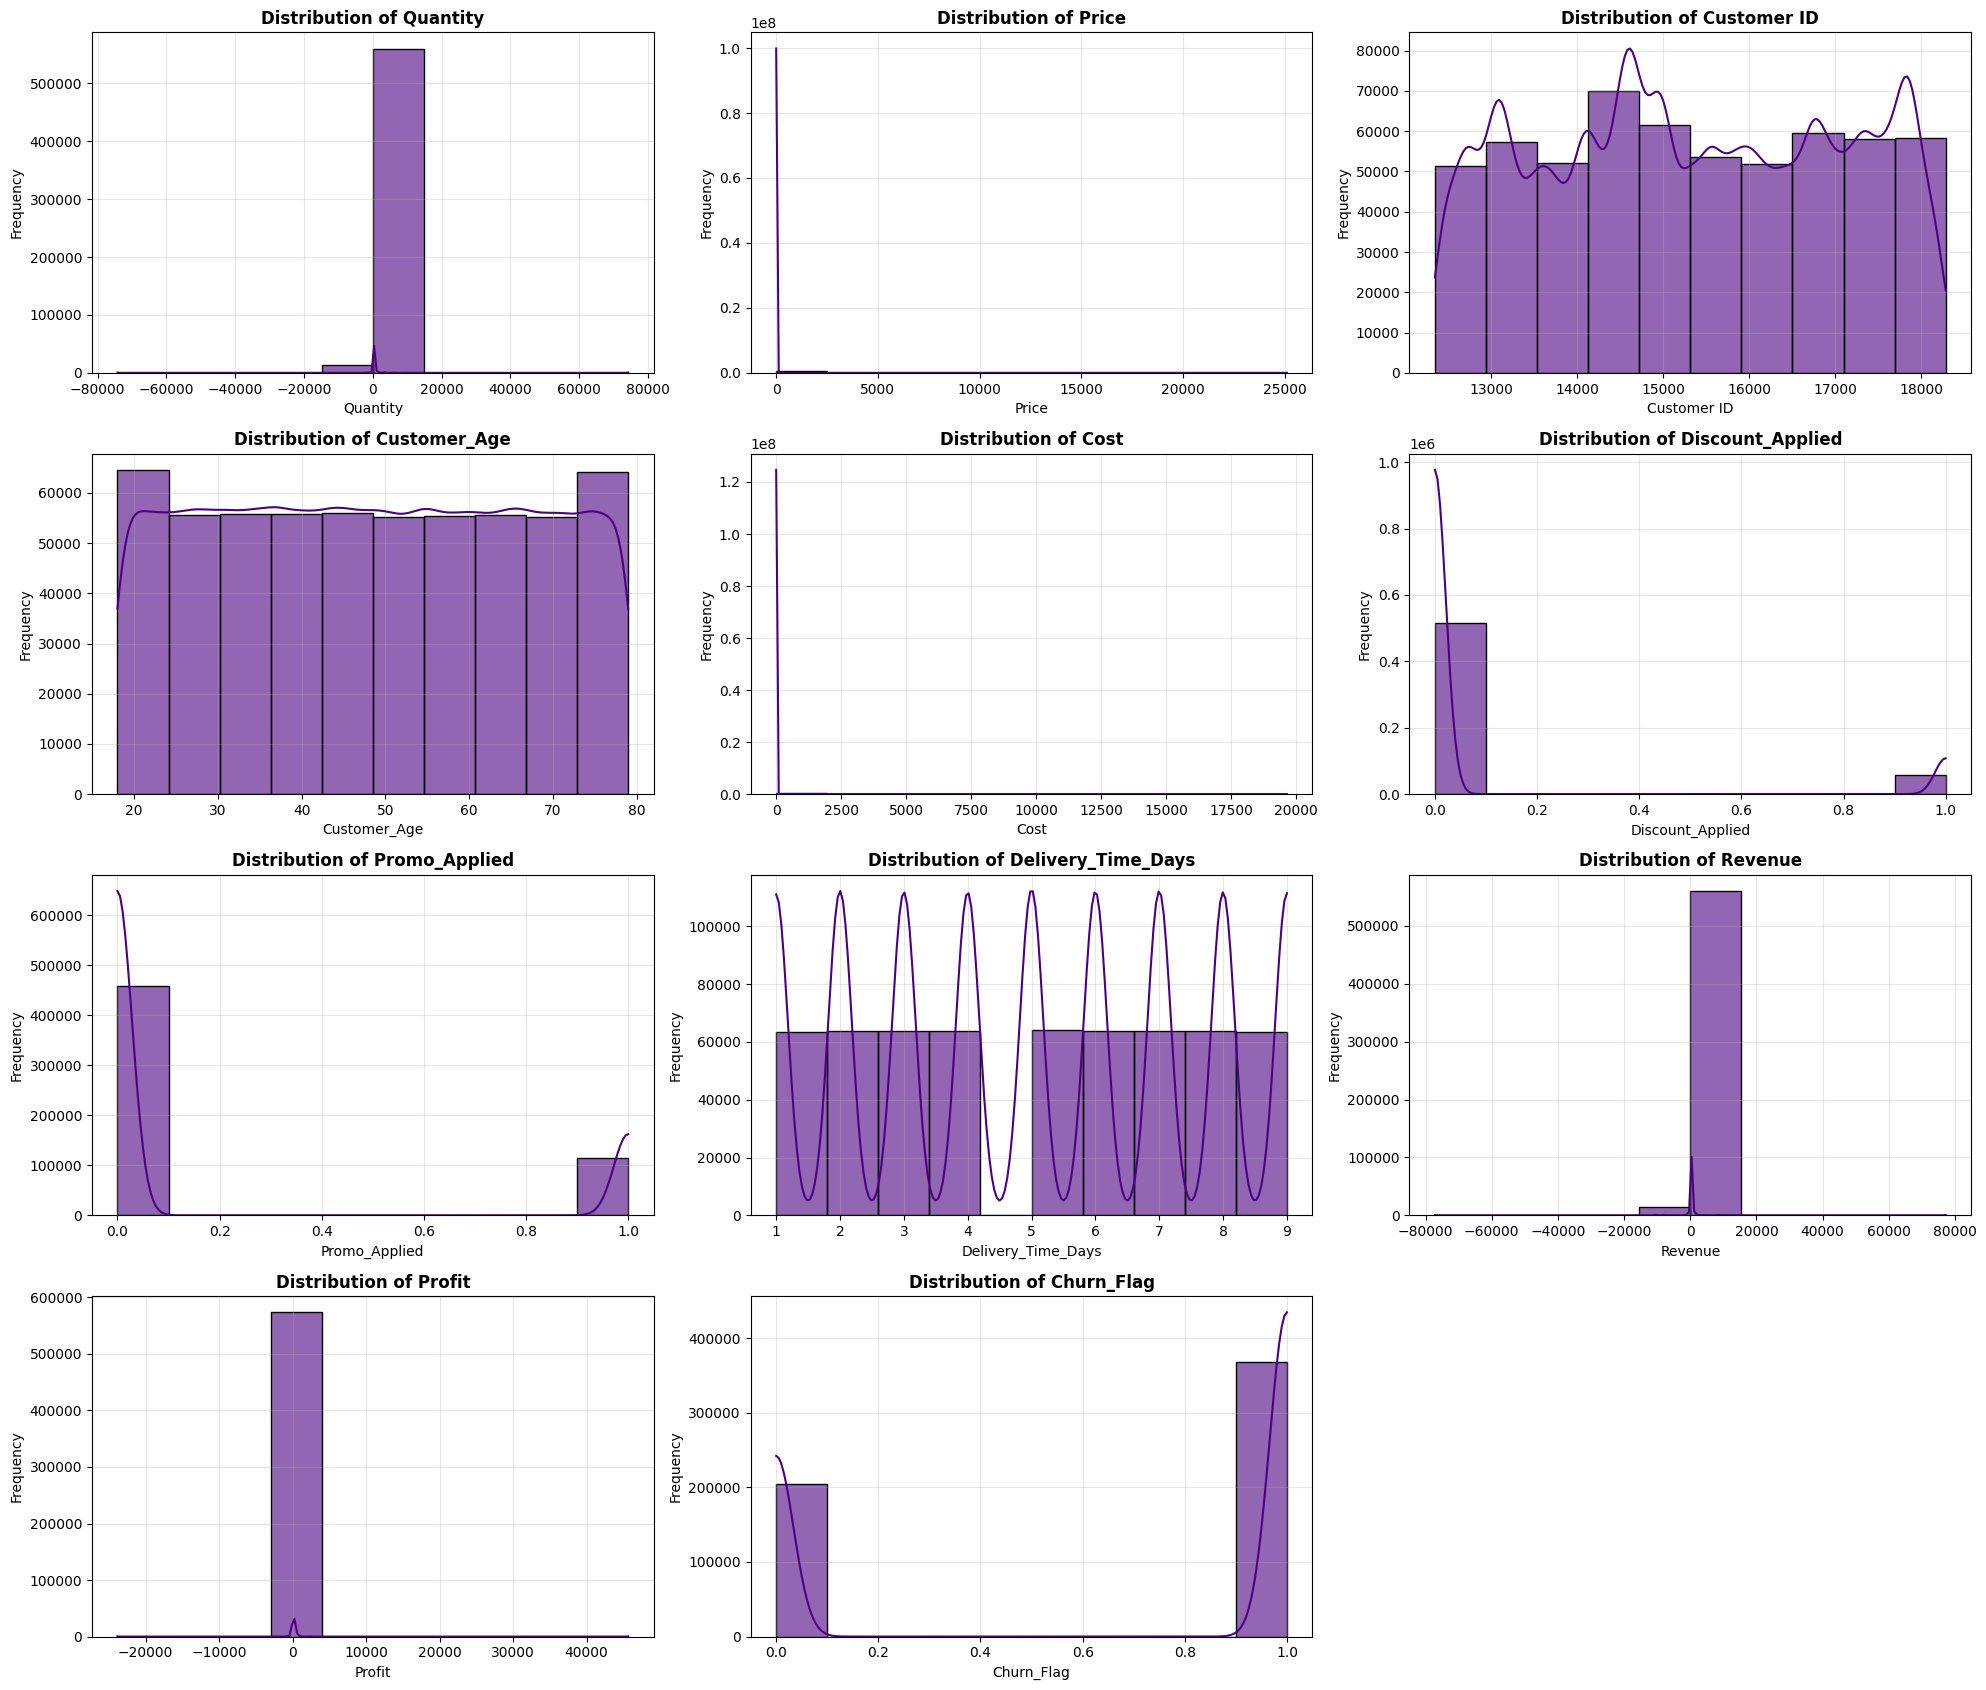

In [22]:
# numerical analysis of columns
# Analyse the distributions of numeric columns
plt.figure(figsize=(20,17))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(data=df, x=col, kde=True, color='indigo', alpha=0.6, bins=10)
    plt.ylabel(f'Frequency')
    plt.title(f'Distribution of {col}', fontweight='bold')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

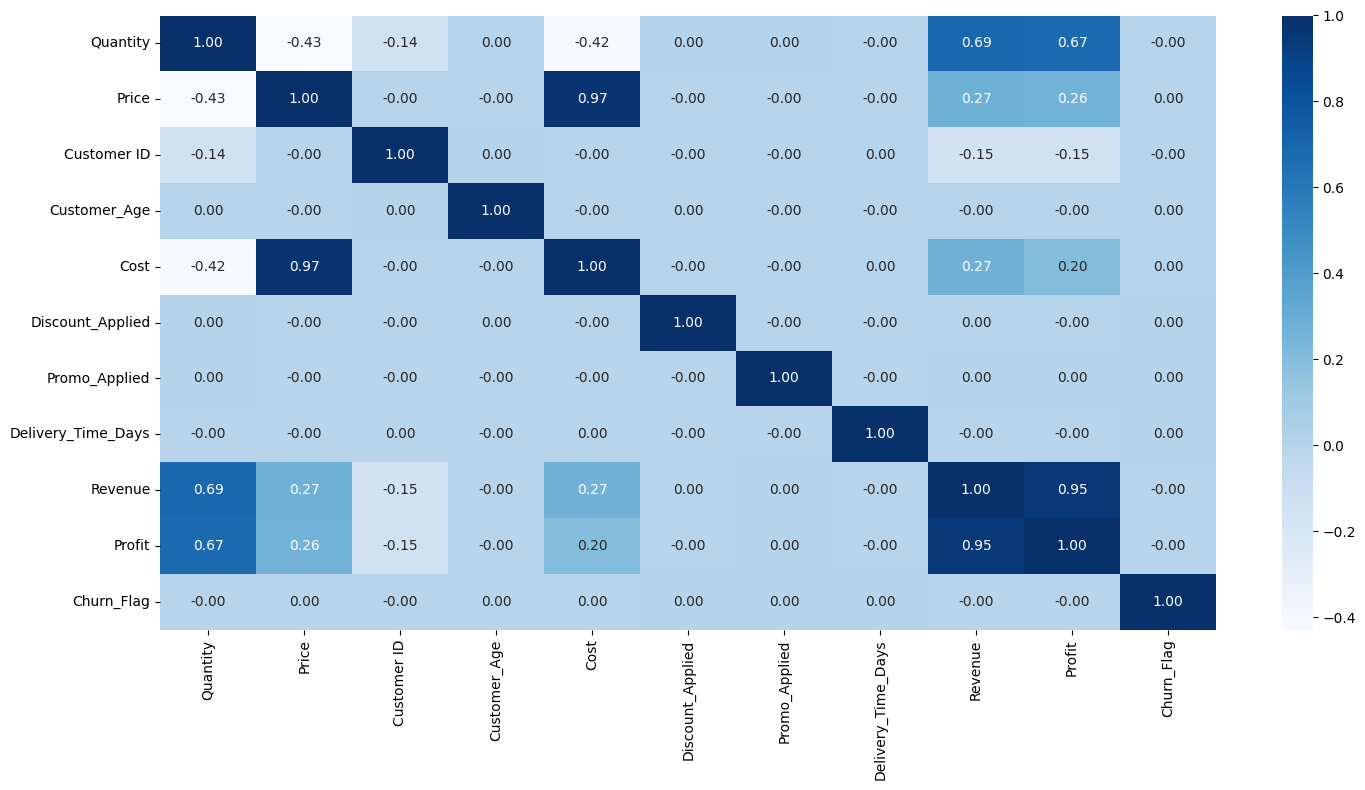

In [23]:
corr = df.corr(numeric_only=True, method='spearman')

plt.figure(figsize=(15,8))
sns.heatmap(data=corr, annot=True, fmt='.2f',cmap='Blues')
plt.tight_layout()
plt.show()

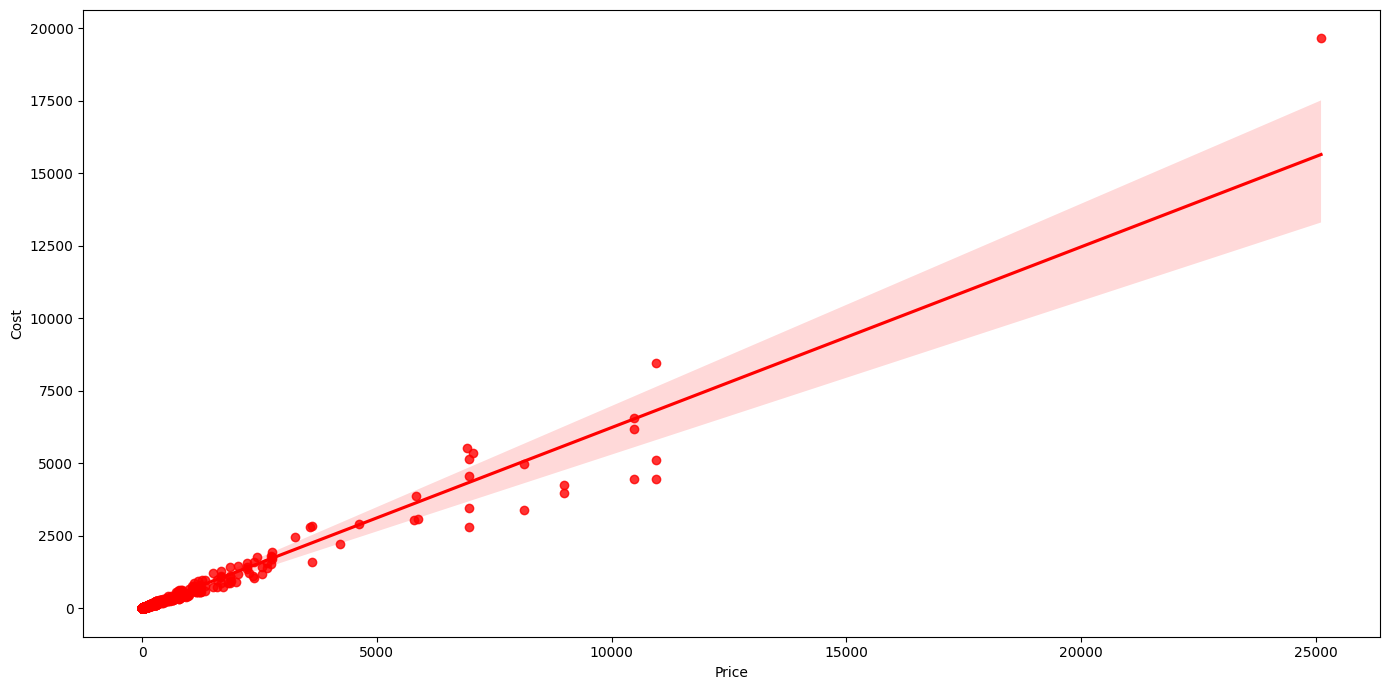

In [24]:
plt.figure(figsize=(14,7))
sns.regplot(data=df, x=df['Price'], y=df['Cost'], marker='o',color='red')
plt.tight_layout()
plt.show()

`Insight`
- There is 0.97 correlation between Cost and Price. 
- There is also a 96% correlation between revenue and profit
- Further analysis suggest that this is merely correlation and not causation

In [25]:
def compare_two_groups(
        df, numeric_col, grouping_col, grouping_val1, grouping_val2, alpha
):
    group1 = df[df[grouping_col] == grouping_val1][numeric_col].dropna()
    group2 = df[df[grouping_col] == grouping_val2][numeric_col].dropna()

    if len(group1) < 3 or len(group2) < 3:
        print(f'Insufficient data. Analyzes not possible')

    sample_size = min(5000, len(group1), len(group2))
    _, p1 = stats.shapiro(group1.sample(min(sample_size, len(group1)), random_state=42))
    _, p2 = stats.shapiro(group2.sample(min(sample_size, len(group2)), random_state=42))

    if p1 < alpha or p2 < alpha:
        stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
        test_type = 'mannwhitneyu'
    else:
        stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
        test_type = "Welch's t-test"

    # effect size
    try:
        pooled_std = np.sqrt((group1.std()**2 + group2.std()**2) / len(df))
        cohens_d = abs(group1.mean() - group2.mean()) /  pooled_std if pooled_std else 0
    except ZeroDivisionError as e:
        print(f'Pooled std is zero. Cannot calculate effect size')
        sys.exit(1)
    if cohens_d < 0.2:
        effect_interpretation = 'negligible'
    elif cohens_d < 0.5:
        effect_interpretation = 'small'
    elif cohens_d < 0.8:
        effect_interpretation = 'medium'
    else:
        effect_interpretation = 'large'

    return {
        'test_type': test_type,
        'group1_mean': round(float(group1.mean()), 4),
        'group2_mean': round(float(group2.mean()), 4),
        'group1_std': round(float(group1.std()), 4),
        'group2_std': round(float(group2.std()), 4),
        'group1_n': len(group1),
        'group2_n': len(group2),
        'statistic': round(float(stat), 4),
        'p_value': round(float(p_value), 6),
        'significant': p_value < alpha,
        'cohens_d': round(float(cohens_d), 4),
        'effect_interpretation': effect_interpretation
    }

from joblib import Parallel, delayed
results = Parallel(n_jobs=-1, backend='threading')(
    delayed(compare_two_groups)(
        df, col, 'Churn_Flag', 0, 1, 0.05
    )
    for col in numeric_cols[:-1]
)

ttest_results = {
        col: result for col, result in zip(numeric_cols, results) 
        if result is not None
    }


for col, result in ttest_results.items():

    print(
        f'{col}\n\nGroup1 mean : {result['group1_mean']}\nGroup2 mean : {result['group2_mean']}\n'
        f'P-value : {result['p_value']}\nSignificance : {result['significant']}\nCohens_d : {result['cohens_d']}'
        f'\nEffect Interpretation : {result['effect_interpretation']}\n({result['test_type']})\n'
        )

Quantity

Group1 mean : 12.6346
Group2 mean : 12.5682
P-value : 0.659915
Significance : False
Cohens_d : 0.2322
Effect Interpretation : small
(mannwhitneyu)

Price

Group1 mean : 3.7475
Group2 mean : 3.8444
P-value : 0.638922
Significance : False
Cohens_d : 0.7888
Effect Interpretation : medium
(mannwhitneyu)

Customer ID

Group1 mean : 15338.2253
Group2 mean : 15335.7608
P-value : 0.594685
Significance : False
Cohens_d : 0.7795
Effect Interpretation : medium
(mannwhitneyu)

Customer_Age

Group1 mean : 48.45
Group2 mean : 48.4515
P-value : 0.977117
Significance : False
Cohens_d : 0.0452
Effect Interpretation : negligible
(mannwhitneyu)

Cost

Group1 mean : 2.2553
Group2 mean : 2.2951
P-value : 0.612262
Significance : False
Cohens_d : 0.4944
Effect Interpretation : small
(mannwhitneyu)

Discount_Applied

Group1 mean : 0.0989
Group2 mean : 0.0996
P-value : 0.389074
Significance : False
Cohens_d : 1.2711
Effect Interpretation : large
(mannwhitneyu)

Promo_Applied

Group1 mean : 0.1983
Gro

`Insight`
- Promo Applied is a necessary feature in modelling because it distinguishes between the binary classes of the target feature best
- Customer Age and Price both have high p-values, yet small effects. Will need to be engineered before modelling.
- Quantity and cost don't also distinguish classes best, but their effect size are small.Will need transformations.
- Discount Applied has an insignificant p-value but a large effect size possibly caused by high variance. Will need variance reduction
- Revenue and profit have an insignificant p-value but large effect size because of the presence of high variance and outliers. Will need log-transformation, binning, winsorizing
- Customer ID is not a meaningful numerical feature. Will be dropped
- Delivery_Time_Days needs feature engineering

In [26]:
def chi_square_test(df, cat_col, target_col, alpha):
    contingency_table = pd.crosstab(df[cat_col], df[target_col])

    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    if (expected < 5).any():
        print(f'{cat_col} : Expected frequencies less than 5, results may be unreliable')

    #Craimer's V effect size
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramers_v =  np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else 0 

    if cramers_v < 0.1: 
        effect_interpretation = 'negligible'
    elif cramers_v < 0.3:
        effect_interpretation = 'small'
    elif cramers_v < 0.5:
        effect_interpretation = 'medium'
    else:
        effect_interpretation = 'high'

    return {
        'chi2': round(float(chi2), 4),
        'p_value': round(float(p_value), 6),
        'dof': int(dof),
        'cramers_v': round(float(cramers_v), 4),
        'effect_interpretation': effect_interpretation,
        'significant': True if p_value < alpha else False,
        'contingency_table': contingency_table.to_dict()
    }

chi_square_results = {}
for col in categorical_col:
    result = chi_square_test(df, col, 'Churn_Flag', 0.05)
    chi_square_results[col] = result


    print(
        f'{col}\nChi-square = {result['chi2']}\nP-value = {result['p_value']}\n'
        f'Signifance = {result['significant']}\nCramers_v = {result['cramers_v']}\n'
        f'Effect interpretation = {result['effect_interpretation']}\n'
    )


Invoice : Expected frequencies less than 5, results may be unreliable
Invoice
Chi-square = 31762.3818
P-value = 0.912181
Signifance = False
Cramers_v = 0.2353
Effect interpretation = small

StockCode : Expected frequencies less than 5, results may be unreliable
StockCode
Chi-square = 4229.579
P-value = 0.674813
Signifance = False
Cramers_v = 0.0859
Effect interpretation = negligible

Description : Expected frequencies less than 5, results may be unreliable
Description
Chi-square = 4713.2531
P-value = 0.764249
Signifance = False
Cramers_v = 0.0906
Effect interpretation = negligible

InvoiceDate : Expected frequencies less than 5, results may be unreliable
InvoiceDate
Chi-square = 29487.2791
P-value = 0.863904
Signifance = False
Cramers_v = 0.2267
Effect interpretation = small

Country : Expected frequencies less than 5, results may be unreliable
Country
Chi-square = 32.9822
P-value = 0.776397
Signifance = False
Cramers_v = 0.0076
Effect interpretation = negligible

Gender
Chi-square = 0

`Insight`
- Last_Login_Date, Signup_Date both have an association with the target with large effect size
- StockCode, Description, Country, Gender, Customer_Segment, Marketing_Channel, Category, Subcategory and Payment_Method are independent but have negligible effect sizes.

In [32]:
# target feature
churn_dist = df['Churn_Flag'].value_counts()
churn_pct = df['Churn_Flag'].value_counts(normalize=True) * 100

imbalance_ratio = churn_dist[0] / churn_dist[1]

if imbalance_ratio > 3:
    print('Severe class balanced detected')
else:
    print(imbalance_ratio)

0.5570232588442244
